## Merging the Japan Economic Policy Uncertanity Index dataset and Household Expenditure Survey dataset (2020-2024)

### 1. Downloading Data

In [ ]:
import pandas as pd

# Load the Japan Economic Policy Uncertainty Index
url_uncertainty = "https://www.policyuncertainty.com/media/Japan_Policy_Uncertainty_Data.xlsx"

# Load the Household Expenditure Survey (Statistics Bureau)
url_expenditure = "https://www.stat.go.jp/data/kakei/longtime/zuhyou/season.xlsx"

# Read the Excel files into DataFrames
df_uncertainty = pd.read_excel(url_uncertainty)
df_expenditure = pd.read_excel(url_expenditure)


### 2. Inspecting / Manipulating the Data

#### Japan Economic Policy Uncertainty Index

In [ ]:
# Check the first few rows to understand the structure
print(df_uncertainty.head(10))

   Year  Month  News-based Economic Policy Uncertainty Index  Unnamed: 3  \
0  1987      1                                     69.623806         NaN   
1  1987      2                                     91.269284         NaN   
2  1987      3                                     94.560551         NaN   
3  1987      4                                     96.725626         NaN   
4  1987      5                                     77.192059         NaN   
5  1987      6                                     90.895461         NaN   
6  1987      7                                     62.166280         NaN   
7  1987      8                                     48.282131         NaN   
8  1987      9                                     55.741379         NaN   
9  1987     10                                     96.120858         NaN   

   Unnamed: 4  Unnamed: 5                                         Unnamed: 6  
0         NaN         NaN  Note: We use the monthly count of articles fro...  
1    

In [ ]:

# Keep only the relevant columns: Year, Month, and Uncertainty Index
df_uncertainty = df_uncertainty[['Year', 'Month', 'News-based Economic Policy Uncertainty Index']]

# Create a combined Date column for easier time-based filtering
df_uncertainty['Date'] = pd.to_datetime(df_uncertainty[['Year', 'Month']].assign(DAY=1))

# Filter data to include only January 2020 through December 2024
start_date = '2020-01-01'
end_date = '2024-12-31'
df_filtered = df_uncertainty[(df_uncertainty['Date'] >= start_date) & (df_uncertainty['Date'] <= end_date)]

# Further filter to keep only January observations (Month == 1)
df_filtered = df_filtered[df_filtered['Date'].dt.month == 1]

# Reset the index after filtering
df_filtered = df_filtered.reset_index(drop=True)

# Retain only Date and Uncertainty Index columns
df_filtered = df_filtered[['Date', 'News-based Economic Policy Uncertainty Index']]

# Check the final filtered dataset
print(df_filtered)

        Date  News-based Economic Policy Uncertainty Index
0 2020-01-01                                    106.729819
1 2021-01-01                                    113.912854
2 2022-01-01                                    101.237394
3 2023-01-01                                     97.301069
4 2024-01-01                                     84.592032


#### Household Expenditure Survey (Statistics Bureau)

In [ ]:
# Check the column names of the expenditure dataset
print(df_expenditure.columns)


Index(['　　　　主要項目の季節調整値―二人以上の世帯', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Unnamed: 9'],
      dtype='object')


In [ ]:
# Keep only the necessary columns: Year, Month, and Nominal Consumption Expenditure Index
df_expenditure = df_expenditure[['Unnamed: 3', 'Unnamed: 1', 'Unnamed: 6']]

# Rename the columns for clarity
df_expenditure.columns = ['Year', 'Month', 'Consumption_Expenditure_Nominal_Index']


In [ ]:
# Drop rows where Year or Month information is missing
df_expenditure = df_expenditure.dropna(subset=['Year', 'Month'])

In [ ]:
# Inspect the Year column to verify correct values
print(df_expenditure['Year'].head(20))


11     2000.0
23     2001.0
35     2002.0
47     2003.0
59     2004.0
71     2005.0
83     2006.0
95     2007.0
107    2008.0
119    2009.0
131    2010.0
143    2011.0
155    2012.0
167    2013.0
179    2014.0
191    2015.0
203    2016.0
215    2017.0
227    2018.0
239    2019.0
Name: Year, dtype: float64


In [ ]:
# Fill down missing Year values to match each Month correctly
df_expenditure['Year'] = df_expenditure['Year'].fillna(method='ffill')

/var/folders/ql/2mvxc9_965g3f9v_mrhry1y80000gn/T/ipykernel_40457/960194351.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_expenditure['Year'] = df_expenditure['Year'].fillna(method='ffill')


In [ ]:
# Fix the Month column: Convert full-width Japanese numbers to half-width (standard) numbers
df_expenditure['Month'] = df_expenditure['Month'].astype(str)           # Ensure Month is string
df_expenditure['Month'] = df_expenditure['Month'].str.translate(
    str.maketrans('０１２３４５６７８９', '0123456789')
)
df_expenditure['Month'] = df_expenditure['Month'].astype(int)            # Convert back to int

# Create a Date column to match with the uncertainty dataset
df_expenditure['Date'] = pd.to_datetime(df_expenditure[['Year', 'Month']].assign(DAY=1))

# Filter expenditure data between January 2020 and December 2024
start_date = '2020-01-01'
end_date = '2024-12-31'
df_filtered_expenditure = df_expenditure[
    (df_expenditure['Date'] >= start_date) & (df_expenditure['Date'] <= end_date)
]

# Keep only Date and Nominal Index columns
df_filtered_expenditure = df_filtered_expenditure[['Date', 'Consumption_Expenditure_Nominal_Index']]

# Reset index after filtering
df_filtered_expenditure = df_filtered_expenditure.reset_index(drop=True)

# Check the final filtered expenditure dataset
print(df_filtered_expenditure)


        Date Consumption_Expenditure_Nominal_Index
0 2020-01-01                                 102.4
1 2021-01-01                                  95.8
2 2022-01-01                                   103
3 2023-01-01                                 109.1
4 2024-01-01                                 105.1


### 3. Merge the two datasets

In [ ]:
# Merge the two datasets based on the 'Date' column
merged_df = pd.merge(df_filtered, df_filtered_expenditure, on='Date', how='inner')

# Check the merged result
print(merged_df)


        Date  News-based Economic Policy Uncertainty Index  \
0 2020-01-01                                    106.729819   
1 2021-01-01                                    113.912854   
2 2022-01-01                                    101.237394   
3 2023-01-01                                     97.301069   
4 2024-01-01                                     84.592032   

  Consumption_Expenditure_Nominal_Index  
0                                 102.4  
1                                  95.8  
2                                   103  
3                                 109.1  
4                                 105.1  


### (4. Plot the merged dataset)

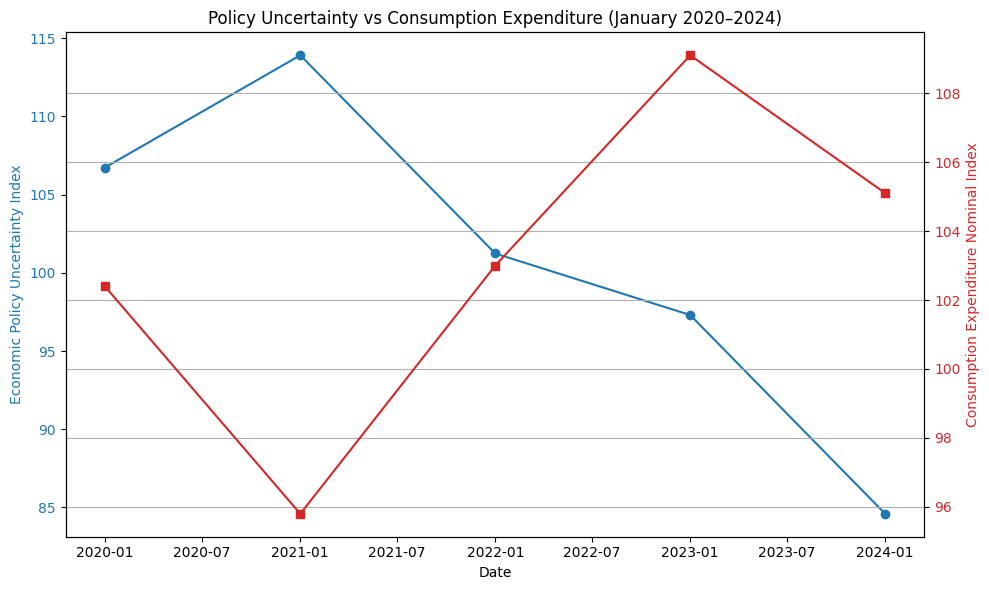

In [66]:
import matplotlib.pyplot as plt

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the Uncertainty Index on the left y-axis
ax1.plot(merged_df['Date'], merged_df['News-based Economic Policy Uncertainty Index'], marker='o', label='Economic Policy Uncertainty Index')
ax1.set_xlabel('Date')
ax1.set_ylabel('Economic Policy Uncertainty Index', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for the Consumption Expenditure Index
ax2 = ax1.twinx()
ax2.plot(merged_df['Date'], merged_df['Consumption_Expenditure_Nominal_Index'], marker='s', color='tab:red', label='Consumption Expenditure Index')
ax2.set_ylabel('Consumption Expenditure Nominal Index', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add title and grid
plt.title('Policy Uncertainty vs Consumption Expenditure (January 2020–2024)')
fig.tight_layout()
plt.grid(True)

# Show the plot
plt.show()